# Simple dataset read and save

**Remark*

Before looking into the details in this notebook, we highly suggest you finish your project part - 1 by yourself. That will greatly enhance your coding ability. 

If you truely can not solve the problem by yourself, you can look into this notebook

In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt

## Load in the data

In [2]:
root = glob.glob('./dataset/mnist_test/*')  # get the all the folders containing images
root

['./dataset/mnist_test/1', './dataset/mnist_test/2']

In [3]:
images_all = []
labels_all = []
for directory in root:
    print(directory)
    label = directory.split('/')[-1]  # get the label from folder name
    img_files = glob.glob(directory+'/*.jpg')  
    for img_f in img_files:
        images_all.append(plt.imread(img_f,'JPG')) # read the image into numpy file
        labels_all.append(label)

./dataset/mnist_test/1
./dataset/mnist_test/2


In [4]:
images_all[0].shape

(28, 28)

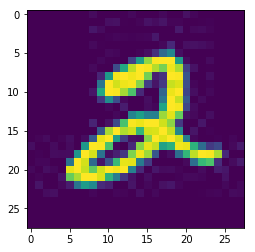

In [5]:
plt.imshow(images_all[3])

## Flatten in to $N \times D$

In [6]:
X = np.array(images_all).flatten().reshape(len(images_all),28*28)
y = np.array(labels_all)
X.shape, y.shape

((4, 784), (4,))

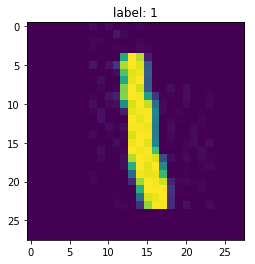

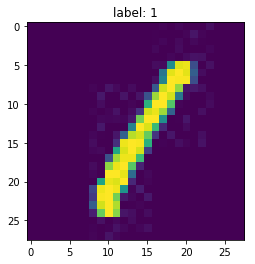

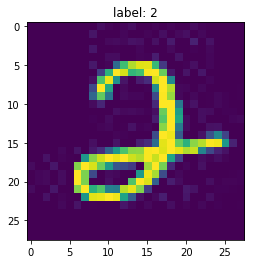

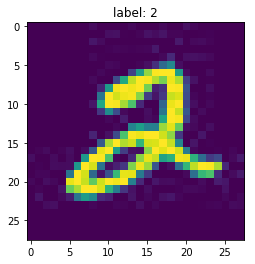

In [7]:
for ind,row in enumerate(X):
    plt.imshow(row.reshape(28,28))
    plt.title("label: " + y[ind])
    plt.show()

## Train test split without sklearn 

In [8]:
VALIDATION_PROPORTION = 0.3 # you can specify any number between 0-1  just the proportion of test size

np.random.seed(2)
probabilities = np.random.uniform(size=len(X)) 
selected_validation = probabilities<VALIDATION_PROPORTION


In [9]:
probabilities = np.random.uniform(size=len(X)) 
selected_validation = probabilities<VALIDATION_PROPORTION
selected_train = ~ selected_validation  # take the binary One’s complement

In [10]:
selected_validation

array([False, False,  True, False])

In [11]:
selected_train

array([ True,  True, False,  True])

In [12]:
Train_X = X[selected_train]
Valid_X = X[selected_validation]
Train_y = y[selected_train]
Valid_y = y[selected_validation]

In [13]:
Train_X.shape

(3, 784)

## Save

In [14]:
np.save("X_train.npy", Train_X)
np.save("y_train.npy", Train_y)
np.save("X_valid.npy", Valid_X)
np.save("y_valid.npy", Valid_y)

## Load

In [15]:
X_load_back = np.load('X_valid.npy')

In [16]:
(X_load_back == Valid_X).all()  # check if all right

True